In [1]:
# import
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

import geopandas as gpd
import json

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

shp_path = "nz.shp"

# Read shapefile into dataframe
geodf = gpd.read_file(shp_path)

# -------------------------------------FUNCTIONS-------------------------------------

###  Read file

In [2]:
def read_file(x):
    df = pd.read_excel(x,sheet_name='Sheet1')
    return df

### Study from salary

#### 1. Salary distribution comparison for different jobs

In [3]:
def salary_distribution_jobs(df):
    job_av_salary = df.groupby('Job_code').mean()[["Lowest Salary", "Higest Salary"]]
    job_av_salary = job_av_salary.head(10)
    return job_av_salary

In [4]:
def salary_distribution_jobs_3(df1, df2, df3):
    
    df1_salary = salary_distribution_jobs(df1)
    df2_salary = salary_distribution_jobs(df2)
    df3_salary = salary_distribution_jobs(df3)
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3 ,figsize=(20,4), sharey=True)

    
    l1 = df1_salary.plot.bar(ax=axes[0], legend=None)
    l2 = df2_salary.plot.bar(ax=axes[1], legend=None)
    l3 = df3_salary.plot.bar(ax=axes[2], legend=None)
    axes[0].title.set_text('Admin')
    axes[1].title.set_text('Banking')
    axes[2].title.set_text('CEO')
    axes[0].set_ylabel('Salary')
    
    axes[0].tick_params(rotation=0)
    axes[1].tick_params(rotation=0)
    axes[2].tick_params(rotation=0)
    
    fig.legend([l1, l2, l3],     # The objects
           labels=["Lowest salary", "Highest salary"],   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           )

#### 2. Salary distribution in different cities

In [5]:
def salary_distribution_city(df):
    city_av_salary = df.groupby('City').mean()[["Lowest Salary", "Higest Salary"]]
    city_av_salary = city_av_salary.head()
    return city_av_salary

In [6]:
def salary_distribution_city_3(df1, df2):
    df1_salary = salary_distribution_city(df1)
    df2_salary = salary_distribution_city(df2)

    
    fig, axes = plt.subplots(nrows=1, ncols=2 ,figsize=(20,4), sharey=True)

    
    l1 = df1_salary.plot.bar(ax=axes[0], legend=None)
    l2 = df2_salary.plot.bar(ax=axes[1], legend=None)
    axes[0].title.set_text('Admin')
    axes[1].title.set_text('Banking')
    axes[0].tick_params(axis='x', rotation=0)
    axes[1].tick_params(axis='x', rotation=0)
    axes[0].set_ylabel('Salary')

    
    fig.legend([l1, l2],     # The objects
           labels=["Lowest salary", "Highest salary"],   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           )
    

In [7]:
# obtain the average salary of a city
def ave_salary_city(df, city):
    auc_data = df[df["City"] == city]
    auc_data = auc_data.groupby('Posted Date (Days Ago)').mean()
    return auc_data[["Lowest Salary", "Higest Salary"]]

##### 3. Salary changes over time

In [8]:
def salary_changes_overtime(df):
    trend1 = ave_salary_city(df, "Tauranga")
    trend2 = ave_salary_city(df, "Auckland Central")
    trend3 = ave_salary_city(df, "Blenheim")
    trend4 = ave_salary_city(df, "Christchurch")
    
    
    fig, axes = plt.subplots(nrows=1, ncols=4 ,figsize=(20,4), sharey=True)

    
    trend1.plot(ax=axes[0])
    trend2.plot(ax=axes[1])
    trend3.plot(ax=axes[2])
    trend4.plot(ax=axes[3])
    axes[0].title.set_text('1. Tauranga')
    axes[1].title.set_text('2. Auckland Central')
    axes[2].title.set_text('3. Blenheim')
    axes[3].title.set_text('4. Christchurch')
    axes[0].set_ylabel('Salary')


### Study from location

#### 1. Market size for different locations 

In [9]:
def market_size_location(df):
    job_counts_region = df.groupby('Region').count()["Job_code"].sort_values()
    job_counts_region.columns = ["Count"]
    return job_counts_region

In [10]:
def market_size_location_2(df1, df2):
    job_counts_region_1 = market_size_location(df1)
    job_counts_region_2 = market_size_location(df2)
    
    fig, axes = plt.subplots(nrows=1, ncols=2 ,figsize=(20,4))

    job_counts_region_1.plot.barh(ax=axes[0])
    job_counts_region_2.plot.barh(ax=axes[1])
    axes[0].title.set_text('Admin market size')
    axes[1].title.set_text('Banking market size')
    

#### 2. Job distribution in different region

In [11]:
def job_distribution_by_region(df, region, file_id):
    jobs_in_region = df[df["Region"] == region]
    job_counts_in_region = jobs_in_region.groupby('Job_code').count()["Company"]
    job_counts_in_region.columns = ["Count"]
    if file_id == 0:
        job_counts_major_in_region = job_counts_in_region[job_counts_in_region >= 70]
        job_counts_minor_in_region = job_counts_in_region[job_counts_in_region < 70].count()
        job_counts_major_in_region.loc["Others"] = job_counts_minor_in_region
    elif file_id == 1:
        if region == "Waikato":
            job_counts_major_in_region = job_counts_in_region
        else:
            job_counts_major_in_region = job_counts_in_region[job_counts_in_region >= 90]
            job_counts_minor_in_region = job_counts_in_region[job_counts_in_region < 90].count()
            job_counts_major_in_region.loc["Others"] = job_counts_minor_in_region
    return job_counts_major_in_region

In [12]:
def job_distribution_by_three_regions(df, file_id):
    df1 = job_distribution_by_region(df, "Auckland", file_id)
    df2 = job_distribution_by_region(df, "Wellington", file_id)
    df3 = job_distribution_by_region(df, "Waikato", file_id)

    
    fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(24, 7))

    
    df1.plot.pie(ax=axes[0],autopct='%1.1f%%')
    df2.plot.pie(ax=axes[1],autopct='%1.1f%%')
    df3.plot.pie(ax=axes[2],autopct='%1.1f%%')
    axes[0].title.set_text('1. Job Distribution in Auckland')
    axes[1].title.set_text('2. Job Distribution in Wellington')
    axes[2].title.set_text('3. Job Distribution in Waikato')

#### 3. Job distribution in different cities in one region

In [13]:
def job_distribution_by_city(df, city, num):
    jobs_in_region = df[df["City"] == city]
    job_counts_in_region = jobs_in_region.groupby('Job_code').count()["Company"]
    job_counts_in_region.columns = ["Count"]
    job_counts_major_in_region = job_counts_in_region[job_counts_in_region >= num]
    job_counts_minor_in_region = job_counts_in_region[job_counts_in_region < num].count()
    job_counts_major_in_region.loc["Others"] = job_counts_minor_in_region
    return job_counts_major_in_region

In [14]:
def job_distributtion_city_region(df):
    jobs_in_region = df[df["Region"] == "Auckland"]
    job_counts_in_region = jobs_in_region.groupby('City').count()["Company"]
    
    
    df1 = job_distribution_by_city(df, "Auckland Central", 70)
    df2 = job_distribution_by_city(df, "Manukau & East Auckland",2)
    df3 = job_distribution_by_city(df, "Papakura & Franklin", 0)

    
    fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(24,7))

    
    df1.plot.pie(ax=axes[0],autopct='%1.1f%%')
    df2.plot.pie(ax=axes[1],autopct='%1.1f%%')
    df3.plot.pie(ax=axes[2],autopct='%1.1f%%')
    axes[0].title.set_text('1. Job Distribution in Auckland Central')
    axes[1].title.set_text('2. Job Distribution in Manukau & East Auckland')
    axes[2].title.set_text('3. Job Distribution in Papakura & Franklin')

### Study from classification

#### 1. Classification shares in the market

In [15]:
def classification_in_market(df):
    job_counts = df.groupby('Job_code').count()["Company"]
    job_counts.columns = ["Count"]
    job_counts_major = job_counts[job_counts >= 70]
    job_counts_minor = job_counts[job_counts < 70].count()
    job_counts_major.loc["Others"] = job_counts_minor
    return job_counts_major

In [16]:
def classification_in_market_2(df1, df2):
    
    job_counts_major1 = classification_in_market(df1)
    job_counts_major2 = classification_in_market(df2)

    
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,10))

    
    job_counts_major1.plot.pie(ax=axes[0],autopct='%1.1f%%')
    job_counts_major2.plot.pie(ax=axes[1],autopct='%1.1f%%')
    axes[0].title.set_text('Admin')
    axes[1].title.set_text('Banking')

### Geo Data

In [17]:
# fix the inconsistency between the dataframe and the shapemap
def fix_region(x):
    if x == "Hawkes Bay Region":
        return "Hawke's Bay Region"
    elif x == "Manawatu Region":
        return "Manawatu-Wanganui Region"
    else: 
        return x

In [18]:
def obtain_mean_values_by_region(df):
    # Obtain the mean values by region in the dataframe
    df['Region'] = df['Region'] + " Region"
    df_mean =df.groupby(['Region']).mean()
    df_mean['Region'] = df_mean.index
    df_mean['Region']=df_mean['Region'].apply(fix_region)
    df_mean.reset_index(drop=True, inplace=True)
    return df_mean


def geo_low_salary_3(geodf, df1, df2, df3):
    # Obtain regions and their ids into dataframe
    geodf['Region'] = geodf['REGC2016_N'] 
    geodf_region = geodf[["REGC2016","Region","geometry"]]
    
    
    df_mean1 = obtain_mean_values_by_region(df1)
    df_mean2 = obtain_mean_values_by_region(df2)
    df_mean3 = obtain_mean_values_by_region(df3)
    
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,7))
    fig.suptitle('The average lowest salary for admin, banking, and CEO jobs.')
    lims = plt.axis('equal')
    
    df_geo1 = pd.merge(df_mean1, geodf_region, how='outer')
    ax1.set_title("Admin")
    gdf1 = gpd.GeoDataFrame(df_geo1)
    gdf1.plot(column="Lowest Salary",ax=ax1, legend=True,vmin=40000, vmax=180000)
    
    
    df_geo2 = pd.merge(df_mean2, geodf_region, how='outer')
    ax2.set_title("Banking")
    gdf2 = gpd.GeoDataFrame(df_geo2)
    gdf2.plot(column="Lowest Salary",ax=ax2, legend=True, vmin=40000, vmax=180000)
      
    
    df_geo3 = pd.merge(df_mean3, geodf_region, how='outer')
    ax3.set_title("CEO")
    gdf3 = gpd.GeoDataFrame(df_geo3)
    gdf3.plot(column="Lowest Salary",ax=ax3, legend=True, vmin=40000, vmax=180000)

In [19]:
def geo_high_salary_3(geodf, df1, df2, df3):
    # Obtain regions and their ids into dataframe
    geodf['Region'] = geodf['REGC2016_N'] 
    geodf_region = geodf[["REGC2016","Region","geometry"]]
    
    
    df_mean1 = obtain_mean_values_by_region(df1)
    df_mean2 = obtain_mean_values_by_region(df2)
    df_mean3 = obtain_mean_values_by_region(df3)
    
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,7))
    fig.suptitle('The average highest salary for admin, banking, and CEO jobs.')
    
    
    df_geo1 = pd.merge(df_mean1, geodf_region, how='outer')
    ax1.set_title("Admin")
    gdf1 = gpd.GeoDataFrame(df_geo1)
    gdf1.plot(column="Higest Salary",ax=ax1, legend=True, vmin=40000, vmax=220000)
    
    
    df_geo2 = pd.merge(df_mean2, geodf_region, how='outer')
    ax2.set_title("Banking")
    gdf2 = gpd.GeoDataFrame(df_geo2)
    gdf2.plot(column="Higest Salary",ax=ax2, legend=True, vmin=40000, vmax=220000)
    
    
    df_geo3 = pd.merge(df_mean3, geodf_region, how='outer')
    ax3.set_title("CEO")
    gdf3 = gpd.GeoDataFrame(df_geo3)
    gdf3.plot(column="Higest Salary",ax=ax3, legend=True, vmin=40000, vmax=220000)
    

In [20]:
def read_ref_table(df, codes):
    print(df.iloc[codes].sort_values(by=["Job_code"]))

# -------------------------------- Read data and encode the job --------------------------------

### Produce a job & job code reference table

In [21]:
df_admin = read_file('Cleaned_NZ_Admin_JOBS.xlsx')
df_banking = read_file('Cleaned_NZ_Banking_JOBS.xlsx')
df_ceo = read_file('Cleaned_NZ_CEO_JOBS.xlsx')


df_admin['Domain'] = "Admin"
df_banking['Domain'] = "Banking"
df_ceo['Domain'] = "ceo"


df_all = pd.concat([df_admin, df_banking, df_ceo], ignore_index=True, sort=False)
df_all[["Job_code"]] = df_all[['Job']]
df_all[['Job_code']] = df_all[['Job_code']].apply(LabelEncoder().fit_transform)


# Job & code reference table
pd.set_option('display.max_colwidth', None)
df_job_code = df_all[["Job_code","Job"]].drop_duplicates().sort_values(by=['Job_code']).reset_index(drop=True)[["Job"]]
df_job_code.index.name = 'Job_code'


df_all = df_all.drop(columns=['Job'])
df_admin = df_all[df_all['Domain'] == "Admin"]
df_banking = df_all[df_all['Domain'] == "Banking"]
df_ceo = df_all[df_all['Domain'] == "ceo"]

### Job & code reference table

For a better presentation, we encode the names of the jobs into unique codes. The reference table is shown in [reference_table.xlsx]

In [22]:
df_job_code.to_excel('reference_table.xlsx')
df_job_code.head(10)

,Job
Job_code,
0,2 x Non Executive Directors - Electricity Invercargill Limited
1,2 x Non Executive Directors - Invercargill Airport Limited
2,20/383 Change Manager
3,3x BA's...Could this be Wgtn's best kept secret?
4,9 month Fixed Term Contract - Office Administrator - Part-time
5,ACC Contract Coordinator
6,ACCOUNTS ADMINISTRATOR
7,ACES Administrator
8,ADMINISTRATION SPECIALIST - CONSTRUCTION


# -------------------------------------RESULTS-------------------------------------

### 1. Salary distribution comparison for different jobs

We present the lowest and highest salaries of 10 jobs in admin, banking, and CEO.

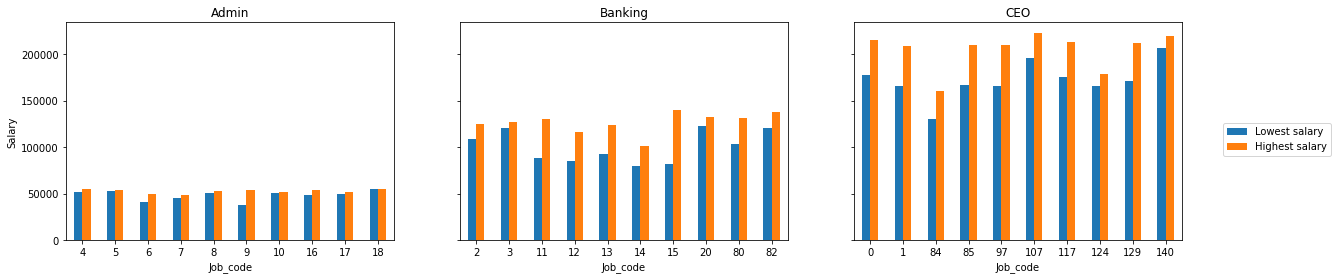

In [23]:
salary_distribution_jobs_3(df_admin,df_banking,df_ceo)

### 2. Salary distribution in different citie

We compare the lowest and highest salary in five cities for admin and banking. The result shows that there isn't a clear salary difference among five cities, but banking jobs have higher salaries compared to admin jobs.

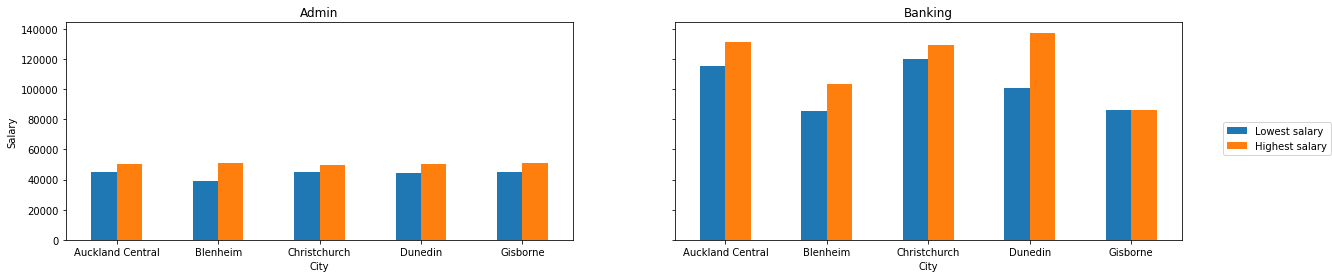

In [24]:
salary_distribution_city_3(df_admin, df_banking)

### 3. How salary changes over time
Average Salary Trend Over Time in four cities (Tauranga, Auckland central, Blenheim, and Christchurch)

##### 3.1 Admin jobs

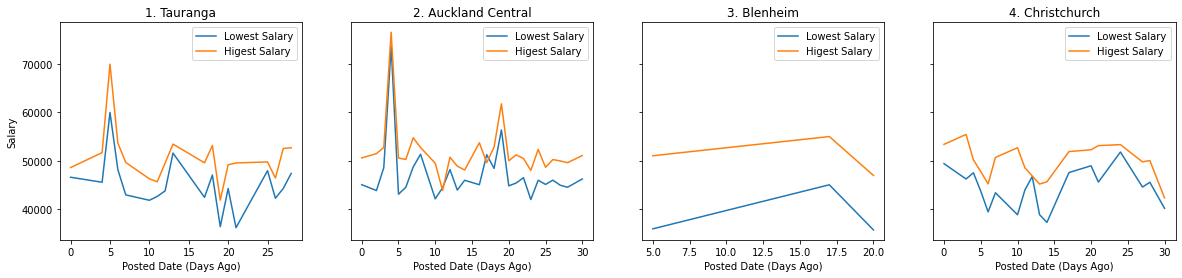

In [25]:
salary_changes_overtime(df_admin)

##### 3.2 Banking jobs

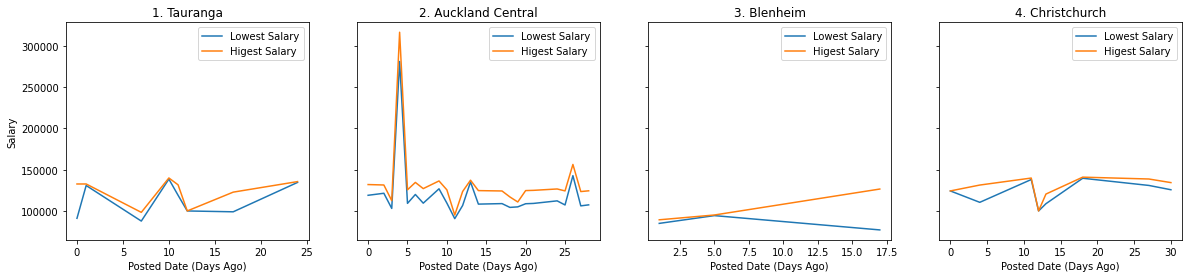

In [26]:
salary_changes_overtime(df_banking)

### 4. Market size for different locations

We show the market size in different locations for admin jobs and banking jobs. The results show that: (1). Auckland has the largest market size for both admin jobs and banking jobs. (2). Admin jobs are relatively more evenly distributed amoung the cities compared to banking jobs. This means it is easier for someone who lives in regional areas to find an admin job rather than banking jobs.

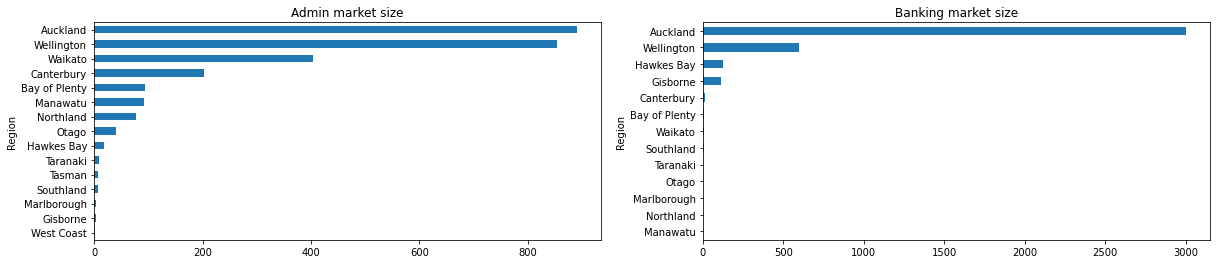

In [27]:
market_size_location_2(df_admin, df_banking)

### 5. Job distribution in different region

We present the job distribution in three regions (i.e., Auckland, Wellington, and Waikato). Note that the numbers outside the pie charts are job codes.

##### 5.1 Admin jobs

The result demonstrates that jobs in Auckland is more diverse, while in Waikato, the majority of the jobs are job #812

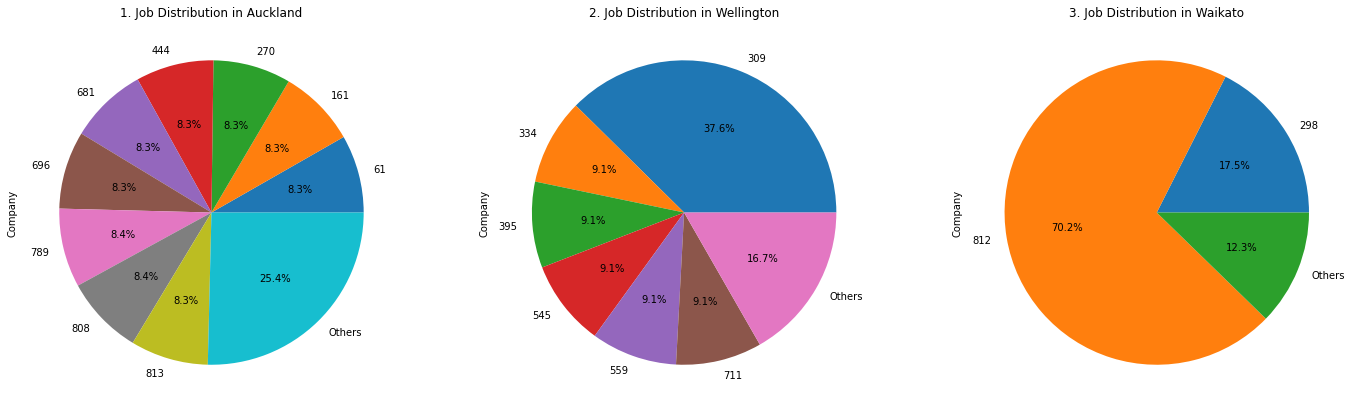

In [28]:
job_distribution_by_three_regions(df_admin, 0)

Auckland admin job reference table

In [29]:
read_ref_table(df_job_code, [444,270,161,61,813,808,789,696,681])

                                                                      Job
Job_code                                                                 
61                                                  Administrator - Temps
161                                                      Category Manager
270                                    Customer Service and Sales Support
444                                                   Key Account Manager
681       Resource Coordinator - Construction (plant, material, supplies)
696                                       Sales Administrator and Support
789                                                    Team Administrator
808       Temp Receptionists/Administrators - Ad Agencies/Music Companies
813                                         Temporary Service Coordinator


Wellington admin job reference table

In [30]:
read_ref_table(df_job_code, [444,270,395,61,545,559,771])

                                                       Job
Job_code                                                  
61                                   Administrator - Temps
270                     Customer Service and Sales Support
395       Graduates with Office Administration Experience!
444                                    Key Account Manager
545                                        On-site Manager
559                               PA / Team Administrators
771                          Short-Term Temp Receptionists


Waikato admin job reference table

In [31]:
read_ref_table(df_job_code, [812,298])

                                     Job
Job_code                                
298       Document Controller - Waikeria
812               Temporary Office Roles


##### 5.2 Banking jobs

The result demonstrates that jobs in Auckland is the most diverse out of three regions

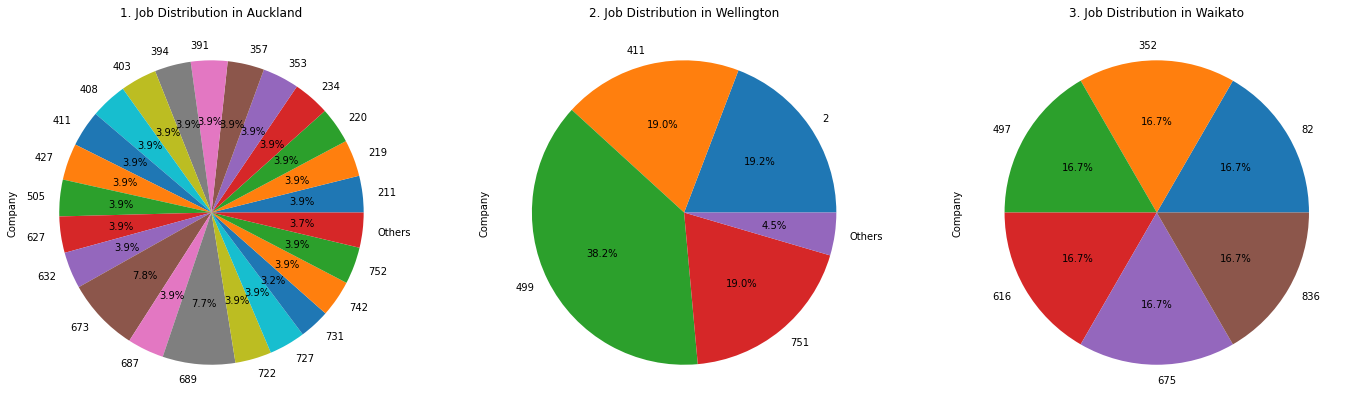

In [32]:
job_distribution_by_three_regions(df_banking, 1)

Auckland banking job reference table

In [33]:
read_ref_table(df_job_code, [752,742,731,727,722,689,687,673,632,627,505,427,411,408,403,394,391,357,353,234,220,219,211])

                                                                                   Job
Job_code                                                                              
211                                                        Commercial Business Analyst
219                                          Compliance Administrator / Legal Graduate
220                                                                 Compliance Manager
234                               Controls Assurance Manager - Expressions of Interest
353                                                       Financial Adviser (Auckland)
357                                                                  Financial Advisor
391                                                  General Manager, Data & Analytics
394       Governance, Risk and Compliance Senior Manager/Director- Assurance- Auckland
403                          Head of Compliance l Funds Management l 12 month contract
408                                        

Wellington banking job reference table

In [34]:
read_ref_table(df_job_code, [411,2,751,499])

                                        Job
Job_code                                   
2                     20/383 Change Manager
411       Head of Technology & Digital Risk
499                         Mortgage Broker
751       Senior Privacy Compliance Manager


Waikato banking job reference table

In [35]:
read_ref_table(df_job_code, [352,82,836,675,616,497])

                                                          Job
Job_code                                                     
82                                       Agribusiness Analyst
352                                         Financial Adviser
497                               Mortgage Advisor / Auckland
616                                  Private Wealth Associate
675       Relationship Manager - Rural - Hamilton or Auckland
836                              Workforce Management Analyst


### 6. Job distribution in different cities in one region

We present the job distribution in three cities (i.e., Auckland central, Manukau & east Auckland, and Papakura & Franklin) in Auckland.

##### 6.1 Admin jobs

The results show that the job distribution is more diverse in Auckland central and Papakura & Frankin.

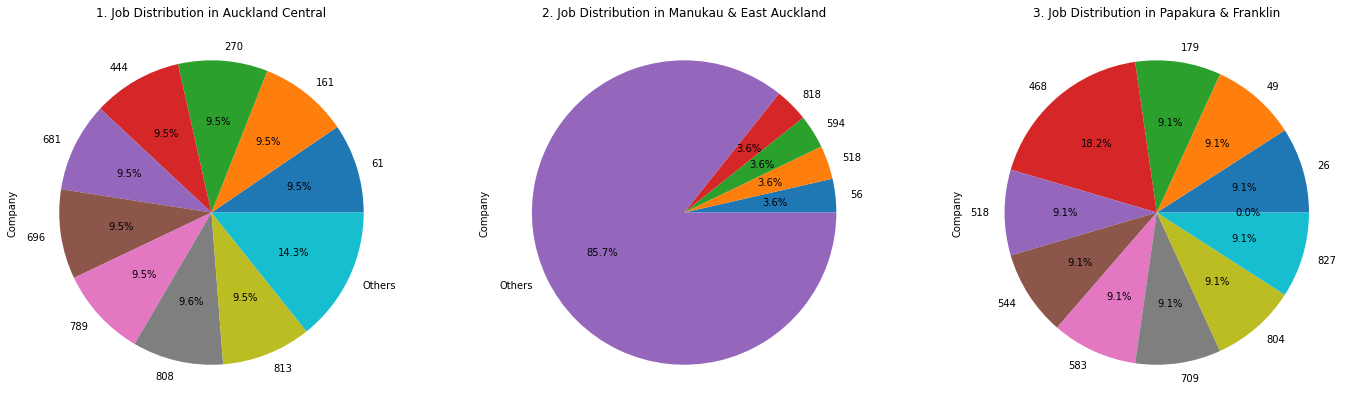

In [36]:
job_distributtion_city_region(df_admin)

Auckland admin job code

In [37]:
read_ref_table(df_job_code, [61,161,270,444,681,696,789,808,813])

                                                                      Job
Job_code                                                                 
61                                                  Administrator - Temps
161                                                      Category Manager
270                                    Customer Service and Sales Support
444                                                   Key Account Manager
681       Resource Coordinator - Construction (plant, material, supplies)
696                                       Sales Administrator and Support
789                                                    Team Administrator
808       Temp Receptionists/Administrators - Ad Agencies/Music Companies
813                                         Temporary Service Coordinator


Manukau & East Auckland admin job code

In [38]:
read_ref_table(df_job_code, [56,518,594,818])

                                         Job
Job_code                                    
56        Administrator - Planned Programmes
518                     Office Administrator
594                       Personal Assistant
818                   Transition Coordinator


Papakura & Franklin admin job code

In [39]:
read_ref_table(df_job_code, [26,49,179,468,518,544,583,709,804,827])

                                                           Job
Job_code                                                      
26                              Admin and Sales Support Person
49                                               Administrator
179                                     Chiropractic Assistant
468                     Love the environment? Operations cadet
518                                       Office Administrator
544                               Office and Workforce Manager
583                            Part-time Admin/Accounts Person
709                              Secretary & Tax Administrator
804                                    Technical Administrator
827       Waiuku Mitre 10 - Trade Administration/Sales Support


##### 6.2 Banking jobs

The results show that the job distribution is the most diverse in Auckland central.In Manukau & East Auckland, the majority of jobs are job #211. There are no available banking job in Papakura & Franklin. 

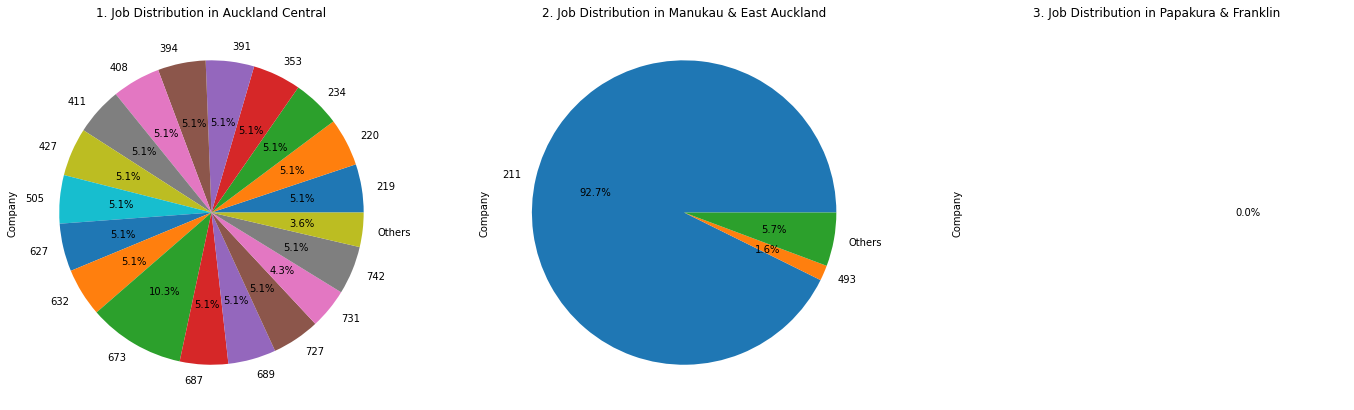

In [40]:
job_distributtion_city_region(df_banking)

Auckland Central banking job code

In [41]:
read_ref_table(df_job_code, [219,220,234,253,391,394,408,411,427,505,627,632,673,687,689,727,731,742])

                                                                                   Job
Job_code                                                                              
219                                          Compliance Administrator / Legal Graduate
220                                                                 Compliance Manager
234                               Controls Assurance Manager - Expressions of Interest
253                                             Customer Banking Consultant - Blenheim
391                                                  General Manager, Data & Analytics
394       Governance, Risk and Compliance Senior Manager/Director- Assurance- Auckland
408                                        Head of Product, Performance and Operations
411                                                  Head of Technology & Digital Risk
427                                                             Internal Audit Manager
505                                        

Manukau & East Auckland banking job code

In [42]:
read_ref_table(df_job_code, [211,493])

                                  Job
Job_code                             
211       Commercial Business Analyst
493                  Mortgage Advisor


### 7. Classification shared in the market

We compare the classification shared in the whole market for admin jobs and banking jobs. The result shows that both admin and banking jobs have a wide range of classifications.

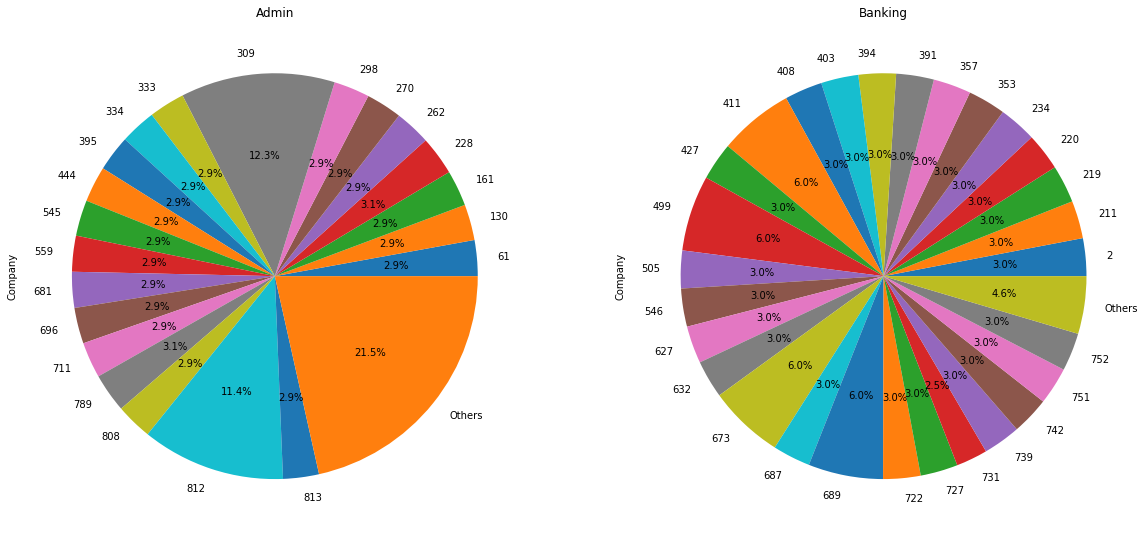

In [43]:
classification_in_market_2(df_admin, df_banking)

In [44]:
read_ref_table(df_job_code, [61,130,161,228,262,270,298,309,333,334,395,444,545,559,681,696,711,789,808,812,813])

                                                                      Job
Job_code                                                                 
61                                                  Administrator - Temps
130                       Business Professional - Temporary Opportunities
161                                                      Category Manager
228                                               Contracts Administrator
262                                      Customer Service & Sales Support
270                                    Customer Service and Sales Support
298                                        Document Controller - Waikeria
309                                                   Executive Assistant
333                                             Experienced Administrator
334                           Experienced Executive & Personal Assistants
395                      Graduates with Office Administration Experience!
444                                   

In [45]:
read_ref_table(df_job_code, [2,211,219,220,234,353,357,391,394,403,408,411,427,499,505,546,627,632,673,687,689,722,727,731,739,742,751,752])

                                                                                   Job
Job_code                                                                              
2                                                                20/383 Change Manager
211                                                        Commercial Business Analyst
219                                          Compliance Administrator / Legal Graduate
220                                                                 Compliance Manager
234                               Controls Assurance Manager - Expressions of Interest
353                                                       Financial Adviser (Auckland)
357                                                                  Financial Advisor
391                                                  General Manager, Data & Analytics
394       Governance, Risk and Compliance Senior Manager/Director- Assurance- Auckland
403                          Head of Compli

### 8. Average lowest salary for admin, banking, and CEO jobs shown in the map

The results demonstrate a clear salary difference among admin, banking, and CEO jobs. However, the variance of the same job among different locations is relatively small. 

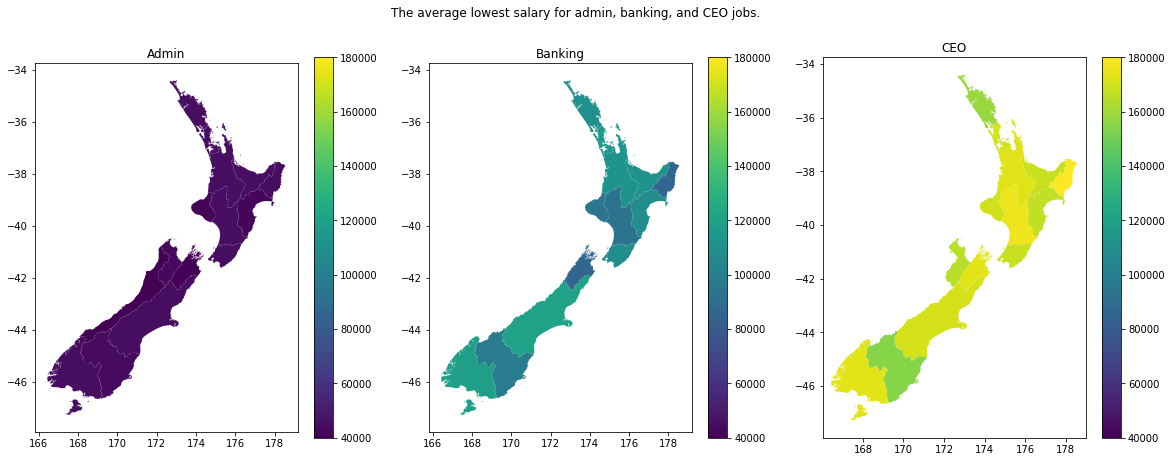

In [46]:
geo_low_salary_3(geodf, df_admin, df_banking, df_ceo)

# ------------------------------------CONCLUSION------------------------------------

1. Auckland has the largest market size
2. Auckland has the most diversed job classification, where Auckland Central is the most diverse in Auckland
3. The salary difference among admin, banking, and CEO jobs is substaintial, where admin << banking << CEO
4. The salary varience among one type of jobs (e.g., admin jobs) among different locations is small